In [17]:
import cogsworth
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

In [4]:
# this all just makes plots look nice
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [41]:
p_kroupa = cogsworth.pop.Population(100000, sampling_params={"primary_model": "kroupa01"},
                                    use_default_BSE_settings=True)
p_kroupa.sample_initial_binaries()

In [42]:
p_salpeter = cogsworth.pop.Population(100000, sampling_params={"primary_model": "salpeter55"},
                                      use_default_BSE_settings=True)
p_salpeter.sample_initial_binaries()

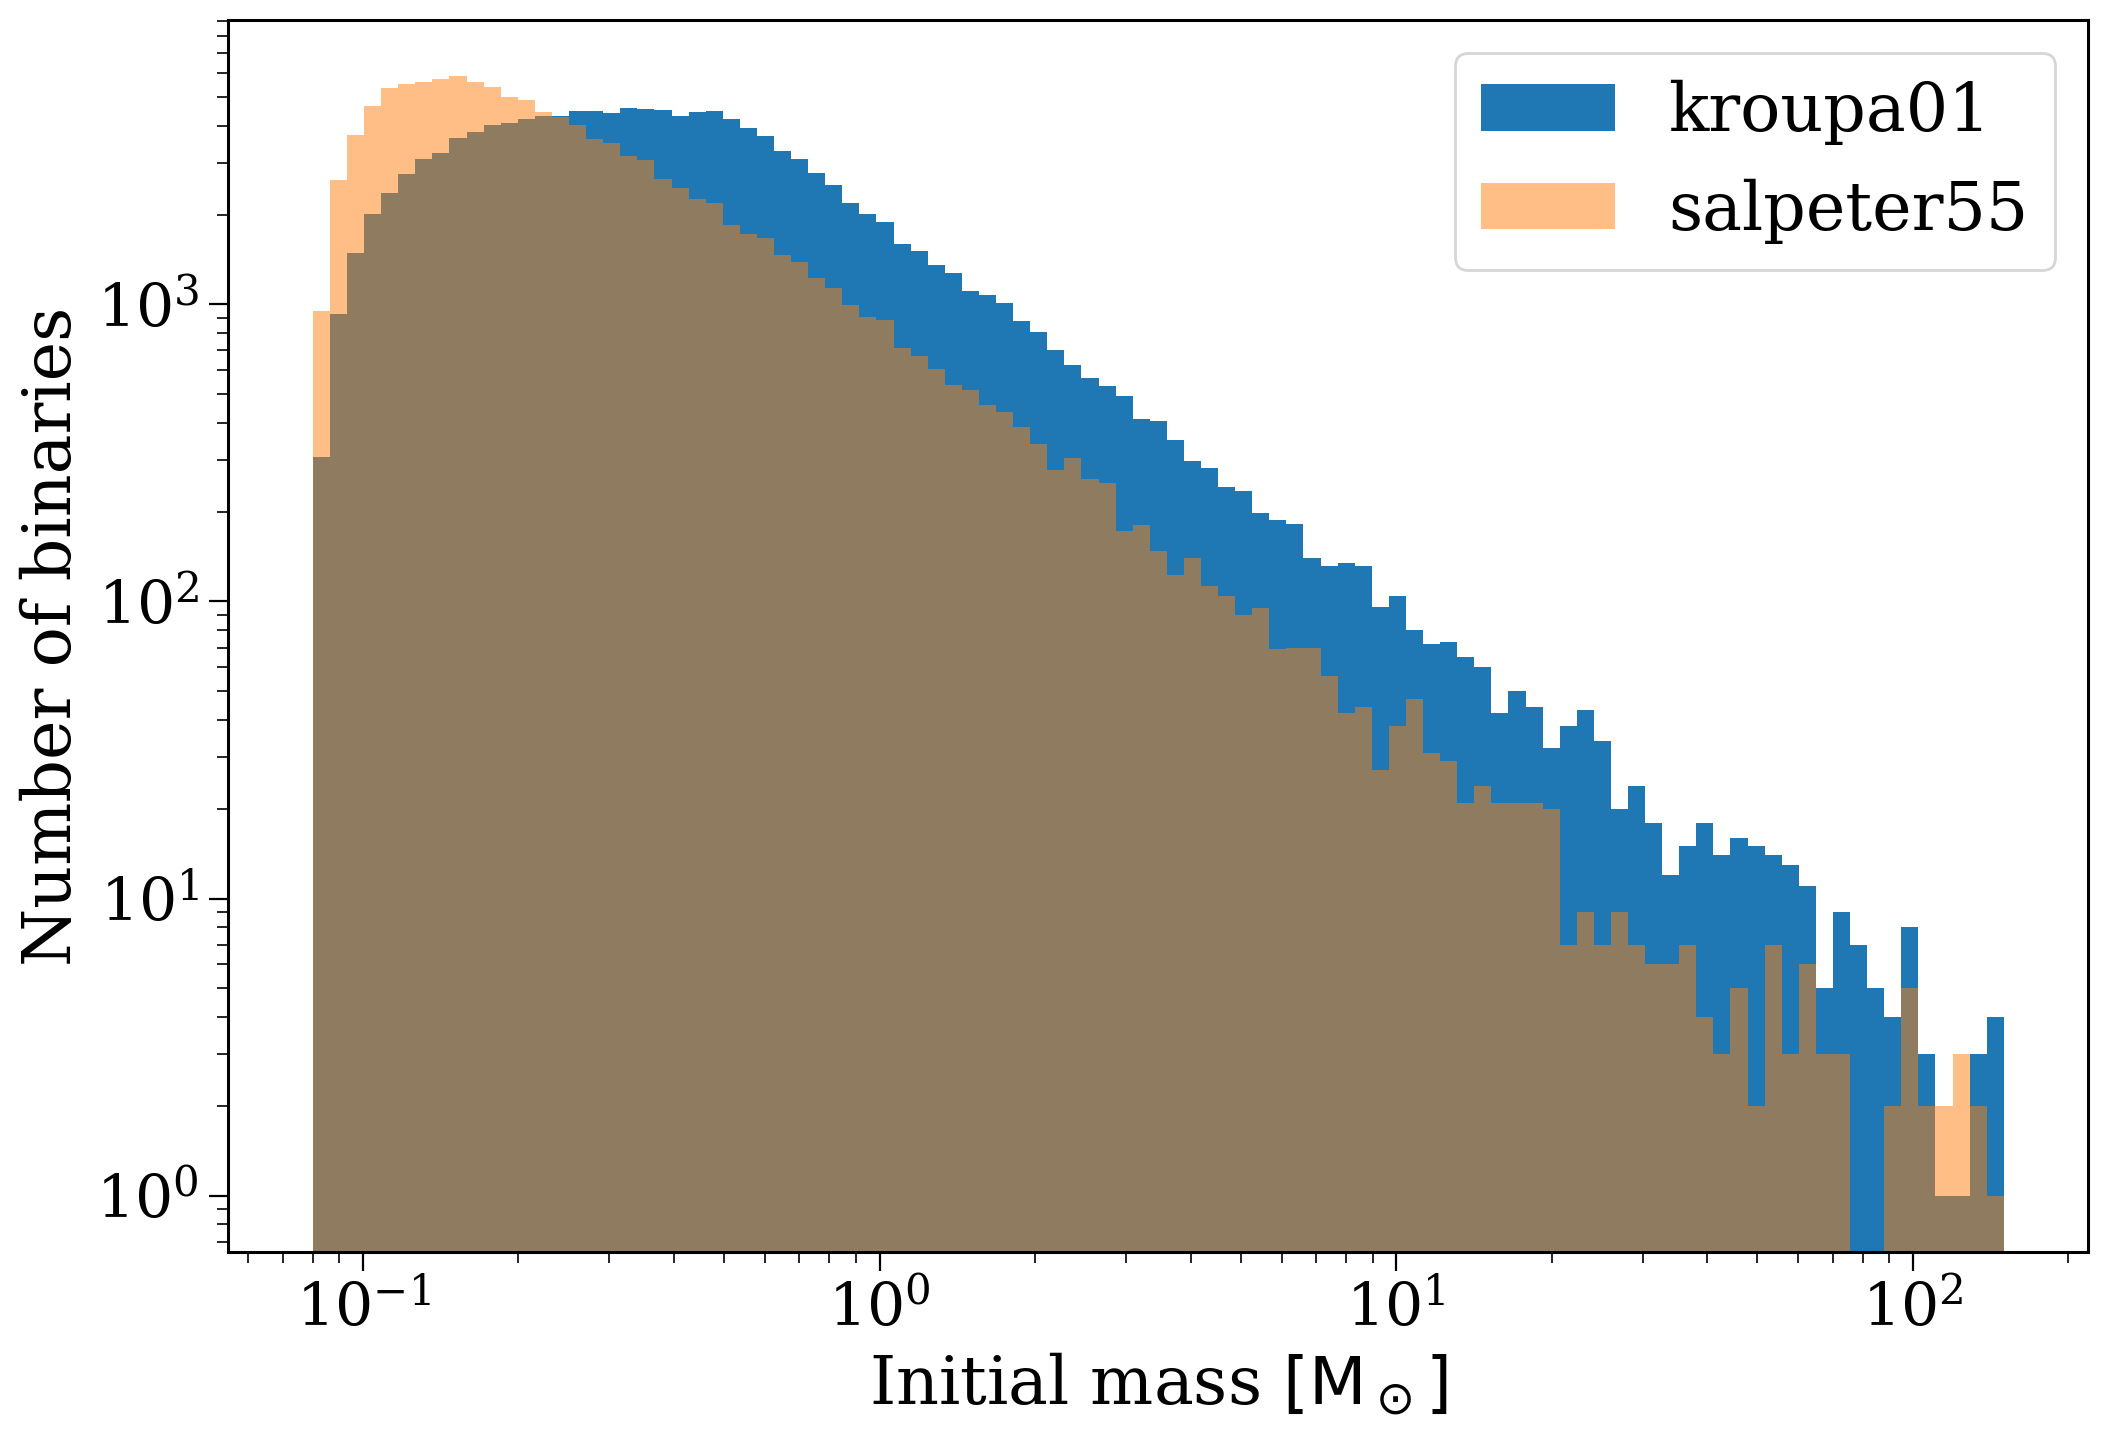

In [43]:
fig, ax = plt.subplots()
for i, p in enumerate([p_kroupa, p_salpeter]):
    ax.hist(p._initial_binaries['mass_1'], bins=np.geomspace(0.08, 150, 100),
            alpha=1 - 0.5 * i, label=p.sampling_params["primary_model"]);
ax.set(xscale="log", yscale="log",
       xlabel=r"Initial mass $[\rm M_\odot]$", ylabel="Number of binaries")
ax.legend()
plt.show()

In [47]:
# n_binaries has to be passed so just pass None
p = cogsworth.pop.Population(n_binaries=None,
                             sampling_params={"sampling_target": "total_mass",
                                              "total_mass": 10000},
                             use_default_BSE_settings=True)
p.sample_initial_binaries()

Great, now we've got a population that resulted from sampling at least 10,000 solar masses. You can see this from checking ``mass_binaries`` and ``mass_singles``.

In [49]:
p.mass_binaries + p.mass_singles

15061.6517250791

In [55]:
p = cogsworth.pop.Population(n_binaries=None,
                             sampling_params={"sampling_target": "total_mass",
                                              "total_mass": 10000,
                                              "trim_extra_samples": True},  # <--- The new bit
                             use_default_BSE_settings=True)
p.sample_initial_binaries()

And now the total sampled mass should be nearly exactly 10,000

In [56]:
p.mass_binaries + p.mass_singles

10000.056038943141

In [57]:
p_with_singles = cogsworth.pop.Population(n_binaries=None,
                                          sampling_params={"sampling_target": "total_mass",
                                                           "total_mass": 10000,
                                                           "trim_extra_samples": True,
                                                           "keep_singles": True},  # <--- the new bit
                                          use_default_BSE_settings=True)
p_with_singles.sample_initial_binaries()

Now this population has single stars in its ``initial_binaries`` table. These still are written as binaries for consistency but the secondary stars are marked as massless remnants and the orbital period is exactly -1.0.

In [68]:
p_with_singles._initial_binaries[p_with_singles._initial_binaries["porb"] == -1.0]

,kstar_1,kstar_2,mass_1,mass_2,porb,ecc,metallicity,tphysf,mass0_1,mass0_2,...,tacc_1,tacc_2,epoch_1,epoch_2,tms_1,tms_2,bhspin_1,bhspin_2,tphys,binfrac
0,1.0,15.0,0.912413,0.0,-1.0,-1.0,0.030000,946.631169,0.912413,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,15.0,0.118979,0.0,-1.0,-1.0,0.000309,10176.723584,0.118979,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,15.0,0.096599,0.0,-1.0,-1.0,0.017823,5884.749489,0.096599,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,15.0,0.332574,0.0,-1.0,-1.0,0.005903,3452.225284,0.332574,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,15.0,0.937848,0.0,-1.0,-1.0,0.010644,6219.320158,0.937848,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6865,0.0,15.0,0.115043,0.0,-1.0,-1.0,0.001549,2322.234682,0.115043,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6866,0.0,15.0,0.560945,0.0,-1.0,-1.0,0.008408,8684.956768,0.560945,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6867,0.0,15.0,0.420765,0.0,-1.0,-1.0,0.004753,10547.585039,0.420765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6868,0.0,15.0,0.346020,0.0,-1.0,-1.0,0.005344,7566.830592,0.346020,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We can compare this to the earlier population which doesn't have any single stars:

In [69]:
(p._initial_binaries["porb"] > 0.0).all()

True

In [70]:
(p_with_singles._initial_binaries["porb"] > 0.0).all()

False